In [189]:
import numpy as np
import gym
from tiles3 import tiles, IHT
from matplotlib import pyplot as plt

In [243]:
class deck():
    def __init__(self):
        self.cards = [1,2,3,4,5,6,7,8,9,10,10,10]*4
    
    def draw(self):
        c = np.random.choice(self.cards)
        self.cards.remove(c)
        return c
    
class player():
    def __init__(self):
        self.cards = []
        self.deck = deck()
        self.theta = np.zeros(23) # states 0 - 21 and one state for anything higher
#         self.state = self.state_maker(sum(self.cards))

        
    def state_maker(self, val):
        phi = np.zeros(23)
        if val == 0:
            phi[0] = 1
        else:
            for i in range(val):

                phi[i] = 1. / np.sqrt(val)
        return phi
        
        
    def step(self, pol_val):
        
        self.cards.append(self.deck.draw())
        
        if sum(self.cards) > 21:
            r = -10
            terminal = True
            self.cards = [23]
        
        elif sum(self.cards) >= pol_val:
            r = sum(self.cards) - 21
            terminal = True
        else:
            r = 0
            terminal = False

            
        return self.state_maker(sum(self.cards)), r, terminal
        
    
    def predict(self, n, pol_val, alpha, gamma, lam):
        """ Perform the td algorithm.  This is straight out of the paper
            n: int, number of episodes
            alpha: float from 0 to 1, step size
            
            returns: weights, state value estimates
        """
        
        
        for _ in range(n):
            e = np.zeros_like(self.theta)
            phi = self.state_maker(sum(self.cards))
            vs = self.theta.dot(phi)
            
            while(1):
                phi_, r, t = self.step(pol_val)
                vs_ = self.theta.dot(phi_)
                
                d = r + gamma * vs_ - vs
                e = gamma * lam * e + alpha * (1 - gamma * lam * e.dot(phi)) * phi
                self.theta = self.theta + d * e + alpha * (vs - self.theta.dot(phi)) * phi
                vs = vs_
                phi = phi_
                
                if t:
                    self.reset()  
                    break
        
        state_vals = [self.theta.dot(self.state_maker(s)) for s in range(0, 22)]
        
        
        return self.theta, state_vals
        
    def reset(self):
        self.cards = []
        self.deck = deck()
    

In [277]:
n_episodes = 1000
stop_val = 8 # policy
alpha = .05
gamma = .1
lam = .9
pl = player()
theta, vals = pl.predict(n_episodes, stop_val, alpha, gamma, lam)

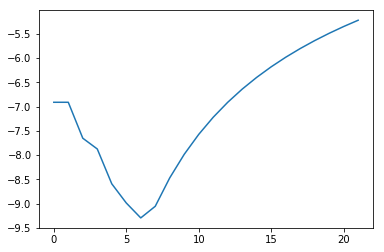

In [278]:
plt.plot(vals)
plt.savefig('21_8.png')

In [111]:
l

[2, 3, 4, 3, 2, 1]